# The Ocean Forecast Model Skill Assessment and Processing Software 1D Prototype: Chesapeake Bay example


This example shows users how to run the Ocean Forecast Model Skill Assessment and Processing Software to do a skill assessment in the Chesapeake Bay Operational Forecast System (CBOFS).

Before using this notebook, please complete Section 2 (**Installation**) and Section 3.1 (**Usage: Jupyter notebook**) in the README on GitLab.

Below, you will find a mixture of text and cells containing executable code. To execute the code, click the cell and press Shift + Enter, or press the 'Run' button at the top of the screen.

To begin, navigate to your working directory, C:\opt\ofs_dps\, by running the code below.

In [1]:
import os

# Navigate to directory where skill assessment software is located
os.chdir('C:\\opt\\ofs_dps')
# Show directory
os.getcwd()

'C:\\opt\\ofs_dps'

## 1. Running the skill assessment

Now you're ready to run the skill assessment software on the CBOFS example data:

In [2]:
# Mute warnings
import warnings
warnings.filterwarnings('ignore')
# Run program! Hooray
%run ./bin/visualization/create_1dplot.py -o cbofs -p ./ -s 2023-11-29T00:00:00Z -e 2023-11-30T00:00:00Z -d MSL -ws [Nowcast,Forecast_b]
print("Finished running!")

Finished running!


In the above command to run the skill assessment, the option *-o* is the name of the OFS (in this case, CBOFS), *-p* the the path to ~/opt/ofs_dps, *-s* and *-e* are the start and end dates, respectively, *-d* is the vertical datum, and *-ws* is the whichcast types (i.e. Nowcast and/or Forecast). All options and arguments for running the skill assessment are summarized in the table below.

| Option explanation | Option syntax | Verbose syntax | Arguments | Required/optional |
|:---:|:---:|:---:|:---:|:---:|
|Show help messages and exit |-h|--help|none|optional|
|Which OFS location<br>([map of OFS locations](https://tidesandcurrents.noaa.gov/models.html)) |-o|--ofs|cbofs, ciofs, dbofs, gomofs, leofs, lmhofs, loofs, lsofs, ngofs2, nyofs, sfbofs, sjofs, sscofs, tbofs, wcofs|required|
|Path to opt\ofs_dps directory|-p|--path|e.g., C:\opt\ofs_dps|optional|
|Start date for assessment|-s|--StartDate|YYYY-MM-DDTHH:MM:SSZ<br>(e.g. 2023-11-29T00:00:00Z)|required|
|End date for assessment|-e|--EndDate|YYYY-MM-DDTHH:MM:SSZ<br>(e.g. 2023-11-30T00:00:00Z)|required|
|Reference tidal datum for water level<br>([List of tidal datums](https://tidesandcurrents.noaa.gov/datum_options.html))|-d|--datum|MHHW, MHW, MTL, MSL, DTL, MLW, MLLW, NAVD, STND|required|
|Which OFS model<br>(e.g. nowcast, forecast)|-ws|--WhichCast|Nowcast, Forecast_A, Forecast_B<br>|required<br>(can use one or all)|required|

## 2. Output

When the skill assessment is finished running, outputs for each of the four software modules (observations, OFS models, skill assessments, and plots/visuals) are saved in separate folders in C:\opt\ofs_dps\data. 

### 2.1 Plots
When the software is finished running, interactive plots are saved in '\opt\ofs_dps\data\visual'. Plots of salinity ('salt'), water temperature ('temp'), water levels ('wl'), and current velocity ('cu') are included for each station in CBOFS. The station ID number is the second item in the plot title. For example, a file titled

_cbofs_44041_17354_cu_vector1_nowcast_forecast_b.html_

is for station 44041 in the CBOFS area, using model node 17354, and is a plot of current velocity ('cu', which is a vector quantity), and includes both nowcast and forecast model output. 

Let's explore a plot. Running the code cell below will open a plot of water temperature through time at station 44041 in the Chesapeake Bay OFS.

In [3]:
import webbrowser
webbrowser.open('.\\data\\visual\\cbofs_44041_17354_temp_scalar2_Nowcast_Forecast_b.html')

True

Use your cursor to hover over the forecast, nowcast, and observational time series, as well as the boxplots on the right-hand side. Try clicking the legend items on the bottom left -- double-clicking a time series will isolate it, while single-clicking will turn any series on or off. You can use the toolbar in the upper right to export the image as a .png. There is an inset plot between the main plot and the legend, where you can use the sliders to rescale the x-axis. 

The forecast, nowcast, and observational data used to generate the time series plots are stored in the folders 'opt\ofs_dps\data\observations\1d_station' and 'opt\ofs_dps\data\model'. You can use the observational and OFS model output to recreate the plots shown here. (Note, however, that the observations have a time resolution of every six hours, while the model outputs are hourly. The plots, as a result, show hourly observations and hourly model output.)

Next, let's explore a 'polar' (or rose) diagram of surface current velocity that shows current speed and direction, and the frequency of each.

In [4]:
webbrowser.open('.\\data\\visual\\cbofs_44041_17354_cu_vector2_Nowcast_Forecast_b.html')

True

Here, you will see three polar plots: one for observations, one for the model forecast, and one for the model nowcast. Hovering your cursor above the different colors on each of the plots will show you the frequency (percent) of surface currents of a given compass direction and speed (in meters per second). 

### 2.2 Station observations

Observations of salinity ('salt'), water temperature ('temp'), current velocity ('cu'), and water level ('wl') are stored as text files (.obs) for each CBOFS station in 'opt\ofs_dps\data\observations\1d_station'. Each file contains multiple rows, each representing an observation at a given time. For scalar variables temperature (degrees C), salinity (practical salinity units, PSU), and water level (meters relative to chosen datum), the column labels are:

| Days elapsed since Jan. 1 | Year | Month | Day | Time (hours) | Time (minutes) | Observation (e.g. salinity) |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|


For vector variables (current velocity), the observation text file column labels are:

| Days elapsed since Jan. 1 | Year | Month | Day | Time (hours) | Time (minutes) | Current speed (m/s) | Current direction<br>(compass direction, 0-360) |_u_ (east/west) velocity component|_v_ (north/south) velocity component| 
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|


### 2.3 Model output (forecasts & nowcasts)

Nowcast and/or forecast model output of salinity, water temperature, current velocity, and water level are stored as text files (.prd) for each CBOFS station in 'opt\ofs_dps\data\model\1d_node'. Like the observation data text files, each model output file contains multiple rows, each representing model output at a given time. The columns in the model output text files are the same as listed above for the observation data text files.

### 2.4 Skill assessment output
Skill assessment metrics -- generated by comparing observational and model data -- are stored in 'opt\ofs_dps\data\skill'. In the 'skill' folder, there are two nested folders: 'stats' and '1d_pair'. In 'skill\stats', you will find comma-separated files (.csv) with time-averaged skill metrics for nowcasts and/or forecasts at each OFS station:

|Statistic|Explanation|
|:---|:---|
|__RMSE__|Root mean square error (RMSE) is the average difference between model predictions and observations over the user-defined skill assessment time period. RMSE quantifies model accuracy: lower values indicate better fit between model predictions and observations, while higher values indicate less model skill. The units of RMSE are the same as the data being analyzed, and RMSE values are always non-negative.|
|__R__|The Pearson correlation coefficient (R) measures the linear correlation between model predictions and observations over the user-defined skill assessment time period. It is a measure of covariance, where the coefficient can range from -1 to 1. Positive (negative) values reflect a positive (negative) correlation. Values close to 0 indicate no correlation between model predictions and observations, and therefore less model skill. Coefficient values approaching 1 or -1 indicate a more robust correlation between model and observations, and therefore more model skill. The Pearson correlation coefficient is unitless.|
|__Bias__|Bias is the average difference between model predictions and observations over the user-defined skill assessment time period. Positive (negative) values indicate model overprediction (underprediction). Units of bias are the same as the observations and model output being analyzed. For currents, which are a vector quantity with both speed and direction, bias applies only to speed.|
|__Bias percent__|Bias percent is the bias divided by the mean of the observations at a given station, multiplied by 100.|
|__Bias direction__|Bias direction is only applicable to current velocity. It is the average difference between model predictions and observations of current direction over the user-defined skill assessment time period. Smaller (larger) values indicate higher (lower) model skill in predicting current direction.|

In the 'skill\1d_pair' folder, text files (.int) contain hourly paired observation-model time series data (i.e., model output and observations in the same text file). Each file contains many rows, each row representing an observation or model output at a given time. For scalar variables (salinity, water level, and water temperature), the columns represent:

| Days elapsed since Jan. 1 | Year | Month | Day | Time (hours) | Time (minutes) | Observation<br>(e.g. salinity) |Model prediction<br>(e.g. salinity)|Bias<br>(predicted minus observed)|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|

For vector variables (current velocity), the columns represent:

| Days elapsed since Jan. 1 | Year | Month | Day | Time (hours) | Time (minutes) | Observed current speed (m/s) |Model-predicted current speed (m/s)|Current speed bias (predicted minus observed)|Observed current compass direction |Model-predicted current compass direction|Current direction bias (predicted minus observed)| 
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|

### 2.5 Log info
The log info, containing errors, warnings, and other run-time info, is by default saved at C:/opt/ofs_dps/log/. Feel free to change that by adjusting the path within /opt/ofs_dps/logging.conf. You may see several log messages regarding data availability for the NBDC stations. These messages should not be treated as errors.

### 2.6 Using the output data to make custom plots and calculate skill metrics
Below we will use the skill assessment output to make a basic time series plot of water level, make a scatter plot of observed vs modeled water level, and then calculate skill assessment metrics.

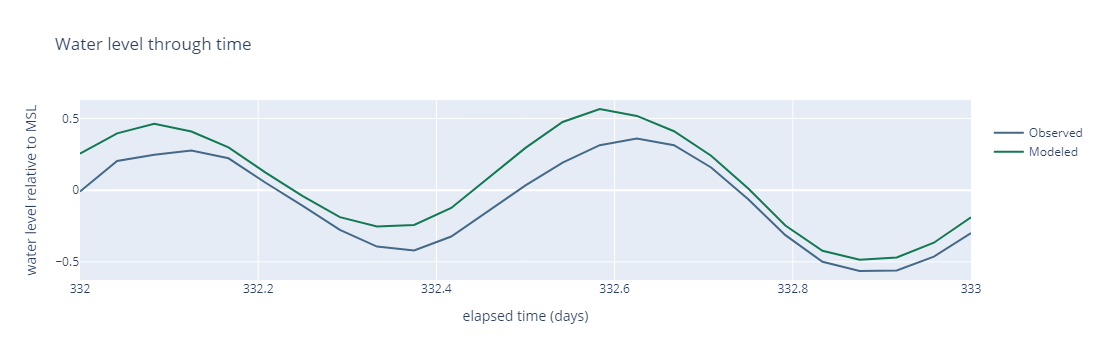

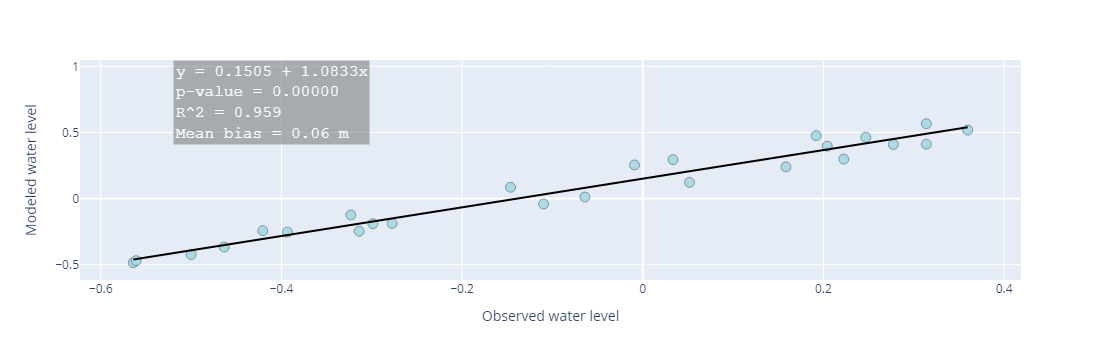

In [8]:
import plotly.express as px
import pandas as pd

# Load paired skill assessment water level output
data = pd.read_csv('C:\\opt\\ofs_dps\\data\\skill\\1d_pair\\cbofs_wl_0204289994_17755_nowcast_pair.int', delim_whitespace=True)
# Time -- days elapsed since January 1 2023
elapsedtime = list(data.iloc[:,0])
# Observed water level
obs_wl = list(data.iloc[:,6])
# Modeled nowcast water level
model_wl = list(data.iloc[:,7])
# Add data to dataframe, get ready for plottin'
df = pd.DataFrame(dict(
    time = elapsedtime, Observed = obs_wl, Modeled = model_wl
))

# DO PLOTS NOW LET'S GO ----->
# Plot water level through time and get it formatted *just right*
fig1 = px.line(df, x="time", y=["Observed", "Modeled"],
             color_discrete_map={
                 "Observed": "#456987",
                 "Modeled": "#147852"
             }, 
              title="Water level through time").update_layout(
    xaxis_title="elapsed time (days)", yaxis_title="water level relative to MSL", legend_title_text=' ')

# Let's see what it looks like
fig1.show()
# Looks great, good job :thumbs up:

# Next plot -- scatter plot of observed vs modeled water level, with skill statistics/metrics included
fig2 = px.scatter(df, x="Observed", y="Modeled", trendline="ols",labels={'Observed': 'Observed water level', 'Modeled':'Modeled water level'},
                 color_discrete_sequence=['lightblue'], trendline_color_override="black")
fig2.update_traces(marker=dict(size=10,line=dict(width=0.5,color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Retrieve/calculate skill metrics, oh yeah
model = px.get_trendline_results(fig2)
results = model.iloc[0]["px_fit_results"]
alpha = results.params[0]    #y-intercept of regression line
beta = results.params[1]     #slope of regression line
p_beta = results.pvalues[1]  #p-value (correlation statistical significance)
r_squared = results.rsquared #r-squared correlation coefficient
# Mean bias, difference between model and observations
meanbias = sum(list(set(model_wl) - set(obs_wl)))/len(list(set(model_wl) - set(obs_wl)))

# Make a cool plot annotation showing skill metrics
line1 = 'y = ' + str(round(alpha, 4)) + ' + ' + str(round(beta, 4))+'x'
line2 = 'p-value = ' + '{:.5f}'.format(p_beta)
line3 = 'R^2 = ' + str(round(r_squared, 3))
line4 = 'Mean bias = ' + str(round(meanbias, 2)) + ' m'
summary = line1 + '<br>' + line2 + '<br>' + line3 + '<br>' + line4

# Add the cool annotation to plot showing skill metrics
fig2.add_annotation(
        x=-0.4,
        y=0.5,
        xref="x",
        yref="y",
        text=summary,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="left",
        bgcolor="rgba(100,100,100, 0.6)",
        opacity=0.8
        )

# Let's see it
fig2.show()
# Done for now. Feel free to make your own plots, it's fun!

## 3. Usage with other OFS data
Ready to do more OFS skill assessments with different OFS model output!? Additional OFS data can be [downloaded via THREDDS](https://opendap.co-ops.nos.noaa.gov/thredds/catalog/catalog.html "NOAA THREDDS data access"). You can continue to use the 'example_data' directory' to store OFS data. Or, you can change the paths to where OFS data is stored on your computer by changing variable "model_historical_dir" in /opt/ofs_dps/conf/ofs_dps.conf. Within the directory storing your data, however, the structure must be as follows: /{name_dir}/{OFS_name}/netcdf/{YYYY}{MM}. For example, the 'example_data' directory you have been using is structured as:

C:\opt\ofs_dps\example_data\cbofs\netcdf\202311